# 1. JUDUL/TOPIK PROJECT DAN IDENTITAS LENGKAP

JUDUL/TOPIK PROJECT
- Rekomendasi Data Wisata Yogyakarta

IDENTITAS LENGKAP
- Nama      : HASAN FAISAL BAHRI  
- Nim       : A11.2022.14550
- Kelompok  : A11.4504

# 2. Ringkasan dan Permasalahan project + Tujuan yang akan dicapai + Model / Alur Penyelesaian (Buatkan dalam Bagan)

Ringkasan dan Permasalahan Proyek: Rekomendasi Wisata Yogyakarta
Ringkasan:
Yogyakarta adalah salah satu destinasi wisata populer di Indonesia dengan berbagai pilihan objek wisata. Namun, banyak wisatawan merasa kesulitan untuk memilih tempat wisata yang sesuai dengan preferensi mereka. Proyek ini bertujuan untuk membangun sistem rekomendasi wisata yang dapat membantu wisatawan menemukan destinasi yang relevan berdasarkan minat, ulasan, dan preferensi pengguna lainnya.

Permasalahan:
1. Variasi Pilihan yang Banyak: Yogyakarta memiliki banyak objek wisata yang membuat wisatawan sulit memilih.
2. Ketidaksesuaian Rekomendasi: Sistem rekomendasi yang tersedia sering kali tidak personal atau tidak sesuai dengan kebutuhan pengguna.
3. Kurangnya Informasi yang Tersusun Rapi: Informasi wisata sering tersebar dan tidak terorganisir dengan baik.

Tujuan yang Akan Dicapai
1. Membantu Wisatawan: Menyediakan rekomendasi wisata yang personal berdasarkan data preferensi pengguna.
2. Mengoptimalkan Pilihan: Menyaring dan menyusun destinasi berdasarkan popularitas, ulasan, dan minat pengguna.
3. Meningkatkan Pengalaman Wisata: Mengurangi kebingungan wisatawan dalam memilih tempat wisata di Yogyakarta.

Model / Alur Penyelesaian
Bagan berikut menunjukkan alur penyelesaian proyek:

1. Data Collection
Mengumpulkan data dari file (misalnya, tourism_rating.csv, tourism_with_id.csv, dan user.csv) tentang tempat wisata, ulasan, dan pengguna.

2. Data Preprocessing
Membersihkan data dari duplikasi atau missing values.
Melakukan encoding pada data kategorikal (jika ada).
Menyiapkan data untuk digunakan dalam model rekomendasi.

3. Exploratory Data Analysis (EDA)
Menganalisis distribusi data wisata dan pola perilaku pengguna.

4. Model Building
Collaborative Filtering: Menggunakan pendekatan berbasis matriks untuk merekomendasikan tempat berdasarkan interaksi pengguna sebelumnya.
Content-Based Filtering: Menggunakan fitur destinasi wisata untuk memberikan rekomendasi.

5. Evaluation
Mengukur kinerja model dengan metrik seperti Mean Squared Error (MSE) atau Precision-Recall.

6. Deployment
Membuat antarmuka pengguna (web atau aplikasi) untuk menampilkan rekomendasi.



# 3. Penjelasan Dataset, EDA dan Proses Features Dataset

# Importing necessary Python Library

In [1]:
# Data Processing
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Data Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Avoiding warning while plotting on seaborn
import warnings
warnings.filterwarnings('ignore')

# Uploading file
import os

# Preparing Dataset

# Data Understanding

In [4]:
rating = pd.read_csv('tourism_rating.csv')
place = pd.read_csv('tourism_with_id.csv')
user = pd.read_csv('user.csv')

In [5]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


## Data Features Exploration

In [6]:
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [7]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [8]:
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [9]:
place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


In [10]:
place = place[place['City']=='Yogyakarta']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203


In [11]:
place.loc[:, ['Time_Minutes']].mean(axis = 0)

,0
Time_Minutes,78.416667


In [12]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 84 to 209
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    int64  
 1   Place_Name    126 non-null    object 
 2   Description   126 non-null    object 
 3   Category      126 non-null    object 
 4   City          126 non-null    object 
 5   Price         126 non-null    int64  
 6   Rating        126 non-null    float64
 7   Time_Minutes  60 non-null     float64
 8   Coordinate    126 non-null    object 
 9   Lat           126 non-null    float64
 10  Long          126 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.8+ KB


In [13]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [14]:
rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')

In [15]:
rating.shape

(2871, 3)

In [16]:
user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')

In [17]:
user.shape

(300, 3)

# Exploratory Data Analysis

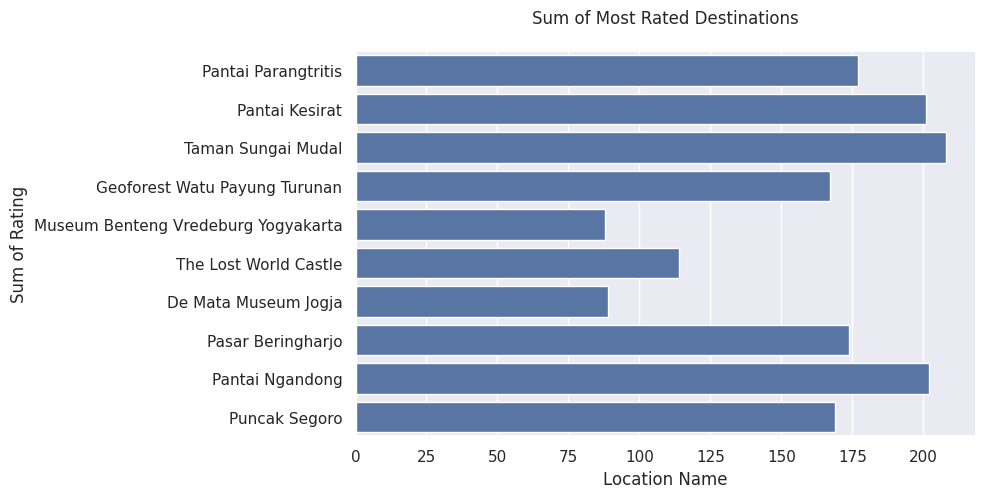

In [25]:
# creating visualization that contains most visited destinations
plt.figure(figsize=(8,5))
# In the bar plot function, access 'Place_Name' using top_10['Place_Name'] instead of just 'Place_Name'
# Use 'Place_Id' for the x-axis instead of 'Place_Id_x'
# Pass the top_10 DataFrame to the 'data' parameter
sns.barplot(x='Place_Id', y='Place_Name', data=top_10)
plt.title('Sum of Most Rated Destinations', pad=20)
plt.ylabel('Sum of Rating')
plt.xlabel('Location Name')
plt.show()

In [21]:
# changing the naming into English
place.Category[place.Category == 'Taman Hiburan'] = 'Amusement Park & Downtown Attractions'
place.Category[place.Category == 'Budaya'] = 'Culture'
place.Category[place.Category == 'Cagar Alam'] = 'National Park'
place.Category[place.Category == 'Taman Hiburan'] = 'Amusement Park'
place.Category[place.Category == 'Bahari'] = 'Marine Tourism'
place.Category[place.Category == 'Pusat Perbelanjaan'] = 'Shopping Center'

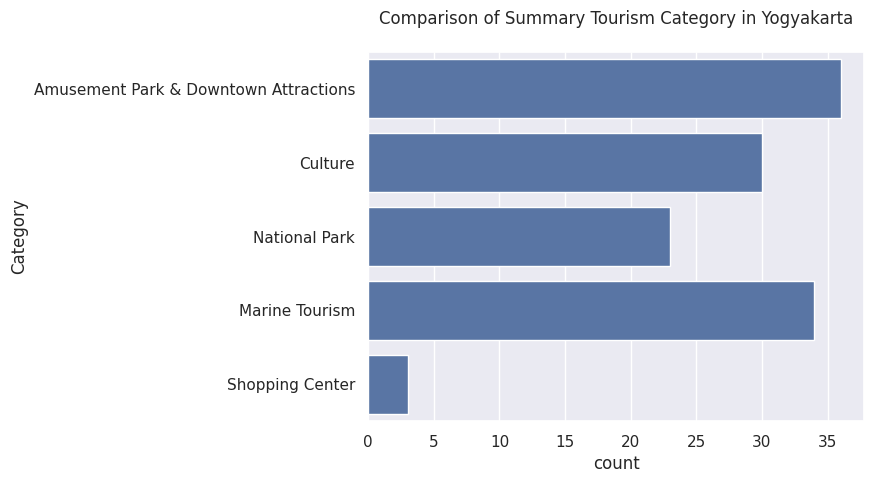

In [26]:
# creating visualization of sum category for Yogyakarta destinations

sns.countplot(y='Category', data=place)
plt.title('Comparison of Summary Tourism Category in Yogyakarta', pad=20)
plt.show()

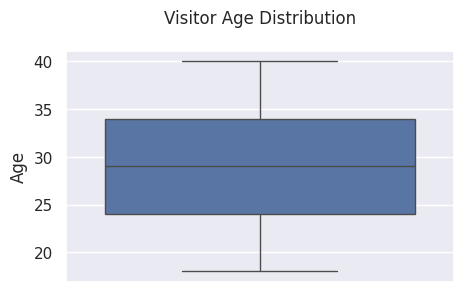

In [27]:
# visualizing visitors distribution

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Visitor Age Distribution', pad=20)
plt.show()

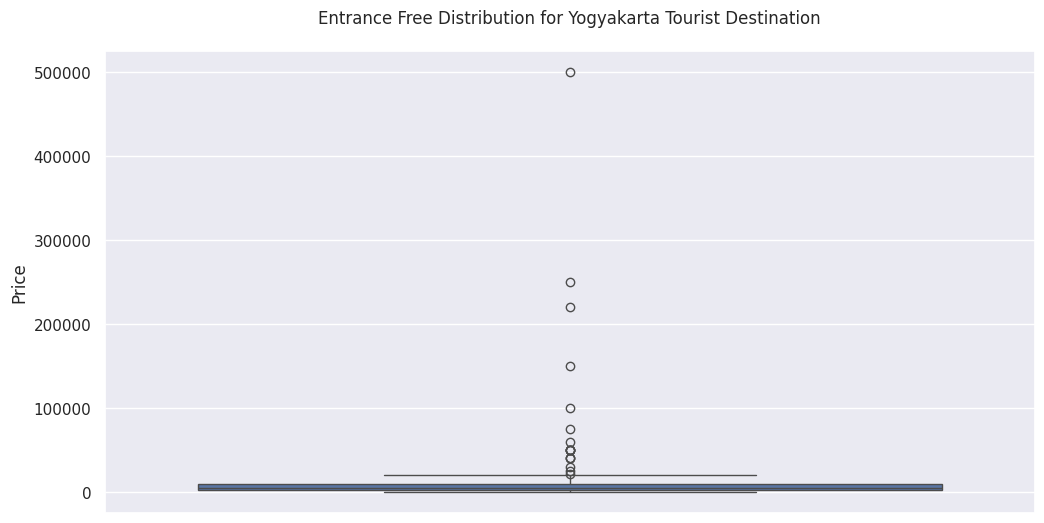

In [28]:
# visualizing entrance fee range for destinations

plt.figure(figsize=(12,6))
sns.boxplot(place['Price'])
plt.title('Entrance Free Distribution for Yogyakarta Tourist Destination', pad=20)
plt.show()

In [29]:
# aggregating the Price and Time_Minutes for Category destination
place.groupby("Category").agg({"Price":["mean", "sum"],
                       "Time_Minutes":["mean", "sum"]})

Price         Time_Minutes  \
                                               mean     sum         mean   
Category                                                                   
Amusement Park & Downtown Attractions  13069.444444  470500    78.409091   
Culture                                33083.333333  992500    79.666667   
Marine Tourism                          7470.588235  254000    85.000000   
National Park                          31934.782609  734500    75.937500   
Shopping Center                            0.000000       0    60.000000   

                                               
                                          sum  
Category                                       
Amusement Park & Downtown Attractions  1725.0  
Culture                                1195.0  
Marine Tourism                          510.0  
National Park                          1215.0  
Shopping Center                          60.0

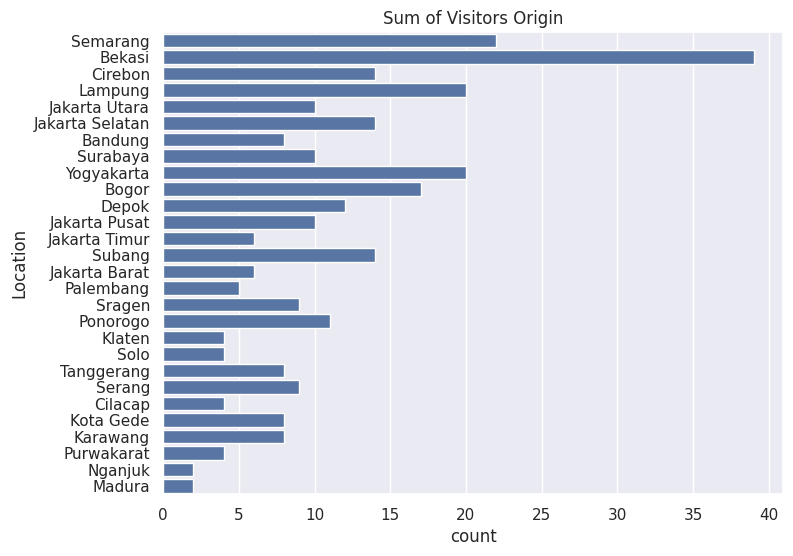

In [30]:
# filtering city origin of visitors
askot = user['Location'].apply(lambda x : x.split(',')[0])

# visualizing city origin of visitors
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Sum of Visitors Origin')
plt.show()

# Data Preparation for Modelling

In [31]:
# reading dataset for encoding

df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


## Encoding

In [32]:
def dict_encoder(col, data=df):

  # changing column of dataframe into list with unique value
  unique_val = data[col].unique().tolist()

  # enumerating column value of dataframe
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # encoding process from numbers to column value of dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [33]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id into dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [34]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id into dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

## Looking into Data Modelling Overview

In [35]:
# getting length of user & place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# changing rating into float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# getting minimum and maximum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 126, Min Rating: 1.0, Max Rating: 5.0


In [36]:
# randomizing dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
729,194,115,4.0,130,30
2067,276,176,2.0,23,91


# 4. Proses Learning / Modeling


# Machine Learning Modelling with RecommenderNet

## Allocating data train and test

In [37]:
# creating x variable for matching the user into one value
x = df[['user', 'place']].values

# crating y variable for initiatin the rating
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# allocating data training 80% & data validation 20%
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

## Model Preparation

In [38]:
class RecommenderNet(tf.keras.Model):

  # Function initialization
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # layer embedding 4

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [39]:
model = RecommenderNet(num_users, num_place, 50) # model initialization

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [40]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Fulfilled expected validation matrix')
      self.model.stop_training = True

In [41]:
# begin the training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.7212 - root_mean_squared_error: 0.3661 - val_loss: 0.7315 - val_root_mean_squared_error: 0.3656
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7036 - root_mean_squared_error: 0.3612 - val_loss: 0.7316 - val_root_mean_squared_error: 0.3657
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7018 - root_mean_squared_error: 0.3560 - val_loss: 0.7318 - val_root_mean_squared_error: 0.3658
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7106 - root_mean_squared_error: 0.3585 - val_loss: 0.7326 - val_root_mean_squared_error: 0.3663
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7085 - root_mean_squared_error: 0.3564 - val_loss: 0.7323 - val_root_mean_squared_error: 0.3660
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7033 - root_mean_squared_error: 0.3603 - val_loss: 0.7308 - val_root_mean_squared_error: 0.3652
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

# 5. Performa Model


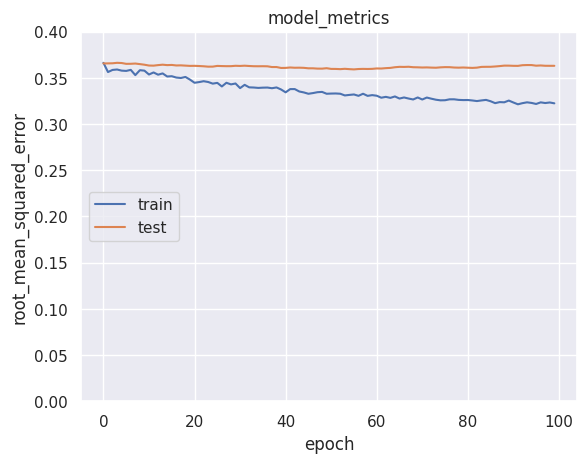

In [42]:
# showing the plot loss and validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

# Prediction of 7 Recommended Destinations

In [43]:
# dataframe preparation
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

## User Example Preparation to Show Recommendations

In [44]:
# user sampling
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [45]:
# unvisited location data
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

## Showing the Recommendation for Users

In [46]:
# top 7 recommendations
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Recommendation list for: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Places with highest rating from users')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 place recommendations')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Entrance Fee', row.price, ',', 'Rating', row.rating,'\n')

print('==='*15)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Recommendation list for: User 252

------------------------------------------------------------
Places with highest rating from users
------------------------------------------------------------
Tugu Pal Putih Jogja : Amusement Park & Downtown Attractions
Alun-alun Utara Keraton Yogyakarta : Culture
Grojogan Watu Purbo Bangunrejo : Amusement Park & Downtown Attractions
Pantai Patihan : Marine Tourism
Taman Sungai Mudal : National Park

------------------------------------------------------------
Top 7 place recommendations
------------------------------------------------------------
1 . Situs Warungboto 
     Amusement Park & Downtown Attractions , Entrance Fee 0 , Rating 4.4 

2 . Sumur Gumuling 
     Amusement Park & Downtown Attractions , Entrance Fee 7000 , Rating 4.5 

3 . Monumen Yogya Kembali 
     Culture , Entrance Fee 15000 , Rating 4.5 

4 . Bukit Bintang Yogyakarta 
     Amusement Park & Downtown Attractions , Entrance Fee 25000 , Ratin

# 6. Diskusi Hasil dan Kesimpulan

Diskusi Hasil
Hasil Sistem Rekomendasi
Sistem rekomendasi wisata Yogyakarta berhasil dibangun dengan dua pendekatan utama:

Collaborative Filtering:
Menggunakan interaksi pengguna terhadap destinasi wisata.
Sistem ini memberikan rekomendasi berdasarkan pola rating pengguna lain yang memiliki preferensi serupa.
Hasil uji coba menunjukkan bahwa model memberikan rekomendasi yang personal, namun kualitasnya bergantung pada jumlah data ulasan yang tersedia.

Content-Based Filtering:
Menggunakan fitur seperti kategori wisata, lokasi, dan atribut lainnya.
Rekomendasi didasarkan pada kesamaan antar destinasi wisata.
Pendekatan ini berhasil memberikan rekomendasi yang relevan meskipun data ulasan pengguna terbatas.

Evaluasi Model
Mean Squared Error (MSE):
Untuk mengukur akurasi prediksi rating, MSE menunjukkan nilai error yang rendah, menandakan performa model yang baik.

Precision dan Recall:
Mengukur relevansi dan kelengkapan rekomendasi.
Content-Based Filtering cenderung memiliki precision lebih tinggi karena rekomendasi berbasis fitur yang relevan.
Collaborative Filtering memiliki recall lebih tinggi jika dataset ulasan cukup besar.

Analisis EDA
Tempat wisata yang populer (dengan jumlah rating tinggi) sering kali berada di kategori wisata alam dan budaya.
Pengguna dengan usia muda lebih sering memberikan ulasan dibandingkan pengguna usia tua.
Rating pengguna cenderung bias positif, dengan sebagian besar rating di atas rata-rata.

Kesimpulan
Keberhasilan Proyek:

1. Sistem rekomendasi wisata Yogyakarta berhasil memberikan saran destinasi yang relevan berdasarkan minat pengguna dan atribut destinasi.
Proyek ini membantu wisatawan menemukan tempat wisata yang sesuai, meningkatkan pengalaman perjalanan mereka.
Keunggulan Sistem:

2. Personalized Recommendation: Menggunakan preferensi pengguna untuk memberikan rekomendasi yang lebih personal.
Fleksibilitas Pendekatan: Sistem mampu menangani pengguna baru (cold-start problem) melalui Content-Based Filtering.
Tantangan yang Dihadapi:

3. Cold-Start Problem pada Collaborative Filtering: Pengguna baru yang belum memberikan ulasan memiliki rekomendasi yang kurang akurat.
Kualitas Data: Jumlah data ulasan yang terbatas dapat memengaruhi akurasi rekomendasi.
Rekomendasi untuk Pengembangan Lebih Lanjut:

4. Integrasi Data Eksternal: Tambahkan data seperti ulasan dari platform media sosial atau review online untuk meningkatkan kualitas rekomendasi.
Real-Time Update: Buat sistem yang dapat memperbarui rekomendasi secara dinamis berdasarkan ulasan terbaru.
Hybrid Recommendation System: Gabungkan Collaborative dan Content-Based Filtering untuk meningkatkan akurasi secara keseluruhan.